In [100]:
import pandas as pd

In [101]:
ppg_final_features=pd.read_csv('PPG_Final.csv')#Reading the ppgfinal dataset

In [102]:
ppg_final_features.head()

,Num.,subject_ID,Sex(M/F),Age(year),Height(cm),Weight(kg),Heart Rate(b/m),BMI(kg/m^2),Hypertension,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,1,2,Female,45,152,63,97,27.268006,Stage 2 hypertension,6.874442,-26.276675,13.268578,6.604219,-13.419384,-10.309675,1.460167,-4.973057,-5.168877,-2.865429,-2.842754,4.394693,4.481392,3.801316,-3.292828,-1.375442,2.333204,3.550070,-0.454649,-0.300077,-1.354707,-3.518339,-0.817157
1,2,3,Female,50,157,50,76,20.284799,Stage 2 hypertension,5.159124,-2.502626,-6.762113,-4.462335,4.832346,-4.531561,-2.889399,0.477159,2.368463,1.272849,-1.995750,0.569276,-1.050329,0.887410,-0.015154,-0.238360,0.679078,-0.406106,1.120136,1.482796,-0.099423,-0.302771,1.489630
2,3,6,Female,47,150,47,79,20.888889,Normal,6.847518,-0.656525,-6.195787,-2.688312,3.748400,-4.270678,-3.660029,1.816695,-0.057156,1.901490,-1.315155,-0.399230,-1.107734,1.545901,-0.621452,1.137124,-0.954881,0.087972,0.053862,0.633556,-0.083866,0.131694,-1.392140
3,4,8,Male,45,172,65,87,21.971336,Prehypertension,1.323732,-21.503364,2.718157,-1.868950,-4.684047,5.366739,-6.550992,0.907731,3.427119,-0.614211,2.359187,-4.396649,-1.647784,0.347119,-2.086219,-1.842610,0.170575,0.180303,-2.153899,1.181756,-0.171474,-0.923647,0.402769
4,5,9,Female,46,155,65,73,27.055151,Prehypertension,1.459466,0.432907,-9.537420,-0.906677,1.538733,-3.219885,-3.096710,2.559676,-2.406415,2.473865,0.254932,-2.116329,2.199281,-0.485608,0.304128,0.220050,0.087176,0.021992,-0.496049,-1.387934,-0.004746,-0.217980,1.494885


In [103]:
ppg_final_features.tail()

,Num.,subject_ID,Sex(M/F),Age(year),Height(cm),Weight(kg),Heart Rate(b/m),BMI(kg/m^2),Hypertension,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
623,215,415,Male,24,180,70,77,21.604938,Normal,-72.401909,-20.107642,12.522296,-1.531184,-5.047079,6.732752,-6.216097,4.689600,5.166555,-1.838252,0.669719,-3.244843,1.908977,2.311359,-2.322337,-0.262343,2.101570,-1.658343,-2.539071,0.975667,0.347281,1.018372,-0.022749
624,216,416,Female,25,156,47,79,19.312952,Normal,-36.165029,7.940083,19.438078,-11.806608,4.169441,-1.547785,5.293846,-4.063925,-0.644778,-2.515566,2.956107,-0.717779,1.327742,0.962166,0.028532,2.096636,-1.810239,1.166950,0.114979,1.555109,0.083398,-0.187578,1.563165
625,217,417,Male,25,176,55,72,17.755682,Prehypertension,-81.240317,-5.511470,10.349496,-4.994268,8.032379,1.337959,6.403757,-2.614858,-1.391262,4.165644,-1.183866,-2.751927,-0.453128,1.251912,-1.135891,-0.331057,1.354226,-1.930205,1.454051,-0.904100,-0.357504,-0.822788,0.051977
626,218,418,Male,25,173,63,67,21.049818,Normal,-70.063659,8.070820,3.256379,4.627454,5.652165,-7.340801,-4.559694,3.014767,-1.112814,3.397074,-2.245192,-1.227508,0.167905,0.971471,-0.639243,1.600905,-1.539055,0.298799,-1.190872,-1.228494,-0.134536,-0.111892,-1.544069
627,219,419,Male,24,175,58,65,18.938776,Normal,-73.544340,9.535612,-2.243643,13.372615,-0.788007,0.752100,1.802363,-0.790950,1.934218,1.732474,-2.065176,-0.154987,0.775857,-0.028609,0.171437,0.199617,0.073931,0.022890,-0.162426,-0.063668,-0.098984,-0.265896,0.006641


In [104]:
ppg_final_features.drop(["Num.","subject_ID"],axis=1,inplace=True)#Dropping the columns which are not required

In [105]:
ppg_final_features.head()

,Sex(M/F),Age(year),Height(cm),Weight(kg),Heart Rate(b/m),BMI(kg/m^2),Hypertension,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,Female,45,152,63,97,27.268006,Stage 2 hypertension,6.874442,-26.276675,13.268578,6.604219,-13.419384,-10.309675,1.460167,-4.973057,-5.168877,-2.865429,-2.842754,4.394693,4.481392,3.801316,-3.292828,-1.375442,2.333204,3.550070,-0.454649,-0.300077,-1.354707,-3.518339,-0.817157
1,Female,50,157,50,76,20.284799,Stage 2 hypertension,5.159124,-2.502626,-6.762113,-4.462335,4.832346,-4.531561,-2.889399,0.477159,2.368463,1.272849,-1.995750,0.569276,-1.050329,0.887410,-0.015154,-0.238360,0.679078,-0.406106,1.120136,1.482796,-0.099423,-0.302771,1.489630
2,Female,47,150,47,79,20.888889,Normal,6.847518,-0.656525,-6.195787,-2.688312,3.748400,-4.270678,-3.660029,1.816695,-0.057156,1.901490,-1.315155,-0.399230,-1.107734,1.545901,-0.621452,1.137124,-0.954881,0.087972,0.053862,0.633556,-0.083866,0.131694,-1.392140
3,Male,45,172,65,87,21.971336,Prehypertension,1.323732,-21.503364,2.718157,-1.868950,-4.684047,5.366739,-6.550992,0.907731,3.427119,-0.614211,2.359187,-4.396649,-1.647784,0.347119,-2.086219,-1.842610,0.170575,0.180303,-2.153899,1.181756,-0.171474,-0.923647,0.402769
4,Female,46,155,65,73,27.055151,Prehypertension,1.459466,0.432907,-9.537420,-0.906677,1.538733,-3.219885,-3.096710,2.559676,-2.406415,2.473865,0.254932,-2.116329,2.199281,-0.485608,0.304128,0.220050,0.087176,0.021992,-0.496049,-1.387934,-0.004746,-0.217980,1.494885


In [106]:
ppg_final_features.info()#reading info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex(M/F)         628 non-null    object 
 1   Age(year)        628 non-null    int64  
 2   Height(cm)       628 non-null    int64  
 3   Weight(kg)       628 non-null    int64  
 4   Heart Rate(b/m)  628 non-null    int64  
 5   BMI(kg/m^2)      628 non-null    float64
 6   Hypertension     628 non-null    object 
 7   0                628 non-null    float64
 8   1                628 non-null    float64
 9   2                628 non-null    float64
 10  3                628 non-null    float64
 11  4                628 non-null    float64
 12  5                628 non-null    float64
 13  6                628 non-null    float64
 14  7                628 non-null    float64
 15  8                628 non-null    float64
 16  9                628 non-null    float64
 17  10              

In [107]:
ppg_final_features.describe()

,Age(year),Height(cm),Weight(kg),Heart Rate(b/m),BMI(kg/m^2),0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
count,628.000000,628.000000,628.000000,628.000000,628.000000,6.280000e+02,6.280000e+02,6.280000e+02,6.280000e+02,6.280000e+02,6.280000e+02,6.280000e+02,6.280000e+02,6.280000e+02,6.280000e+02,6.280000e+02,6.280000e+02,6.280000e+02,6.280000e+02,6.280000e+02,6.280000e+02,6.280000e+02,6.280000e+02,6.280000e+02,6.280000e+02,6.280000e+02,6.280000e+02,6.280000e+02
mean,56.778662,161.203822,60.280255,74.074841,23.147692,1.810300e-16,2.421276e-15,-2.291161e-16,-6.986626e-16,1.357725e-16,-3.774405e-16,2.397233e-16,-9.122215e-17,3.889316e-18,-2.750807e-16,-1.025365e-16,5.562606e-16,-1.516833e-16,-1.294026e-16,1.419600e-16,2.140450e-16,-1.661799e-17,-2.598770e-16,-4.048425e-17,2.539768e-16,7.867026e-18,5.727902e-17,3.146810e-17
std,15.814829,8.176279,11.966505,10.528119,4.045091,2.040988e+01,1.130837e+01,1.121991e+01,8.327007e+00,5.222673e+00,4.133913e+00,3.254130e+00,2.604483e+00,2.164256e+00,1.853986e+00,1.834681e+00,1.647818e+00,1.474445e+00,1.376405e+00,1.315238e+00,1.224654e+00,1.157011e+00,1.090050e+00,1.001444e+00,9.588315e-01,8.869522e-01,8.070084e-01,7.876467e-01
min,21.000000,145.000000,36.000000,52.000000,14.692378,-8.802076e+01,-3.279383e+01,-1.284427e+01,-1.674270e+01,-1.528978e+01,-1.446194e+01,-1.135855e+01,-9.059396e+00,-5.674653e+00,-7.075556e+00,-6.487169e+00,-4.641445e+00,-4.538784e+00,-3.659123e+00,-6.769605e+00,-8.084043e+00,-6.636086e+00,-4.295035e+00,-3.705108e+00,-2.261462e+00,-9.477812e+00,-4.575062e+00,-1.981613e+00
25%,48.000000,155.000000,52.000000,67.000000,20.564077,9.065168e-01,-3.306212e+00,-6.550208e+00,-6.595921e+00,-2.437559e+00,-3.476710e+00,-2.526831e+00,-8.368128e-01,-1.524153e+00,-9.862027e-01,-6.091603e-01,-7.658173e-01,-9.206904e-01,-9.118116e-01,-4.488163e-01,-6.276412e-01,-5.795702e-01,-4.123422e-01,-4.272615e-01,-3.638725e-01,-7.535600e-02,-1.952052e-01,-3.775822e-01
50%,58.000000,160.000000,60.000000,73.000000,22.600263,4.076574e+00,3.503975e+00,-1.315832e+00,1.109453e+00,-1.174064e+00,1.617401e+00,9.267208e-01,-4.728170e-01,4.105353e-01,8.073567e-02,-1.178463e-01,1.155856e-02,2.438753e-02,1.891475e-01,6.227922e-02,1.025476e-01,4.227176e-02,4.380342e-02,-4.028996e-02,-1.230456e-01,2.603114e-03,2.697057e-02,7.900358e-02
75%,67.000000,167.000000,67.000000,80.000000,25.059307,7.393299e+00,6.050261e+00,4.354778e+00,4.196570e+00,3.453092e+00,1.936736e+00,1.100813e+00,1.633273e+00,9.131607e-01,8.187982e-01,6.737384e-01,6.478020e-01,7.715092e-01,7.131018e-01,3.942597e-01,2.943167e-01,5.972185e-01,2.566894e-01,3.530507e-01,5.704214e-01,6.103051e-02,1.711335e-01,2.107035e-01
max,86.000000,196.000000,103.000000,106.000000,37.460978,1.166644e+02,6.001588e+01,1.442140e+02,4.971727e+01,4.144471e+01,1.826795e+01,1.311923e+01,9.520541e+00,7.739655e+00,1.165748e+01,1.539748e+01,1.065354e+01,5.567408e+00,8.722169e+00,8.800422e+00,8.092529e+00,7.916053e+00,6.486101e+00,3.788462e+00,3.014485e+00,1.657561e+01,5.138275e+00,2.333998e+00


In [108]:
target_labels=['Hypertension']

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt


In [110]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'Sex'.
ppg_final_features['Sex(M/F)']= label_encoder.fit_transform(ppg_final_features['Sex(M/F)'])

In [111]:
ppg_final_features.head()

,Sex(M/F),Age(year),Height(cm),Weight(kg),Heart Rate(b/m),BMI(kg/m^2),Hypertension,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,0,45,152,63,97,27.268006,Stage 2 hypertension,6.874442,-26.276675,13.268578,6.604219,-13.419384,-10.309675,1.460167,-4.973057,-5.168877,-2.865429,-2.842754,4.394693,4.481392,3.801316,-3.292828,-1.375442,2.333204,3.550070,-0.454649,-0.300077,-1.354707,-3.518339,-0.817157
1,0,50,157,50,76,20.284799,Stage 2 hypertension,5.159124,-2.502626,-6.762113,-4.462335,4.832346,-4.531561,-2.889399,0.477159,2.368463,1.272849,-1.995750,0.569276,-1.050329,0.887410,-0.015154,-0.238360,0.679078,-0.406106,1.120136,1.482796,-0.099423,-0.302771,1.489630
2,0,47,150,47,79,20.888889,Normal,6.847518,-0.656525,-6.195787,-2.688312,3.748400,-4.270678,-3.660029,1.816695,-0.057156,1.901490,-1.315155,-0.399230,-1.107734,1.545901,-0.621452,1.137124,-0.954881,0.087972,0.053862,0.633556,-0.083866,0.131694,-1.392140
3,1,45,172,65,87,21.971336,Prehypertension,1.323732,-21.503364,2.718157,-1.868950,-4.684047,5.366739,-6.550992,0.907731,3.427119,-0.614211,2.359187,-4.396649,-1.647784,0.347119,-2.086219,-1.842610,0.170575,0.180303,-2.153899,1.181756,-0.171474,-0.923647,0.402769
4,0,46,155,65,73,27.055151,Prehypertension,1.459466,0.432907,-9.537420,-0.906677,1.538733,-3.219885,-3.096710,2.559676,-2.406415,2.473865,0.254932,-2.116329,2.199281,-0.485608,0.304128,0.220050,0.087176,0.021992,-0.496049,-1.387934,-0.004746,-0.217980,1.494885


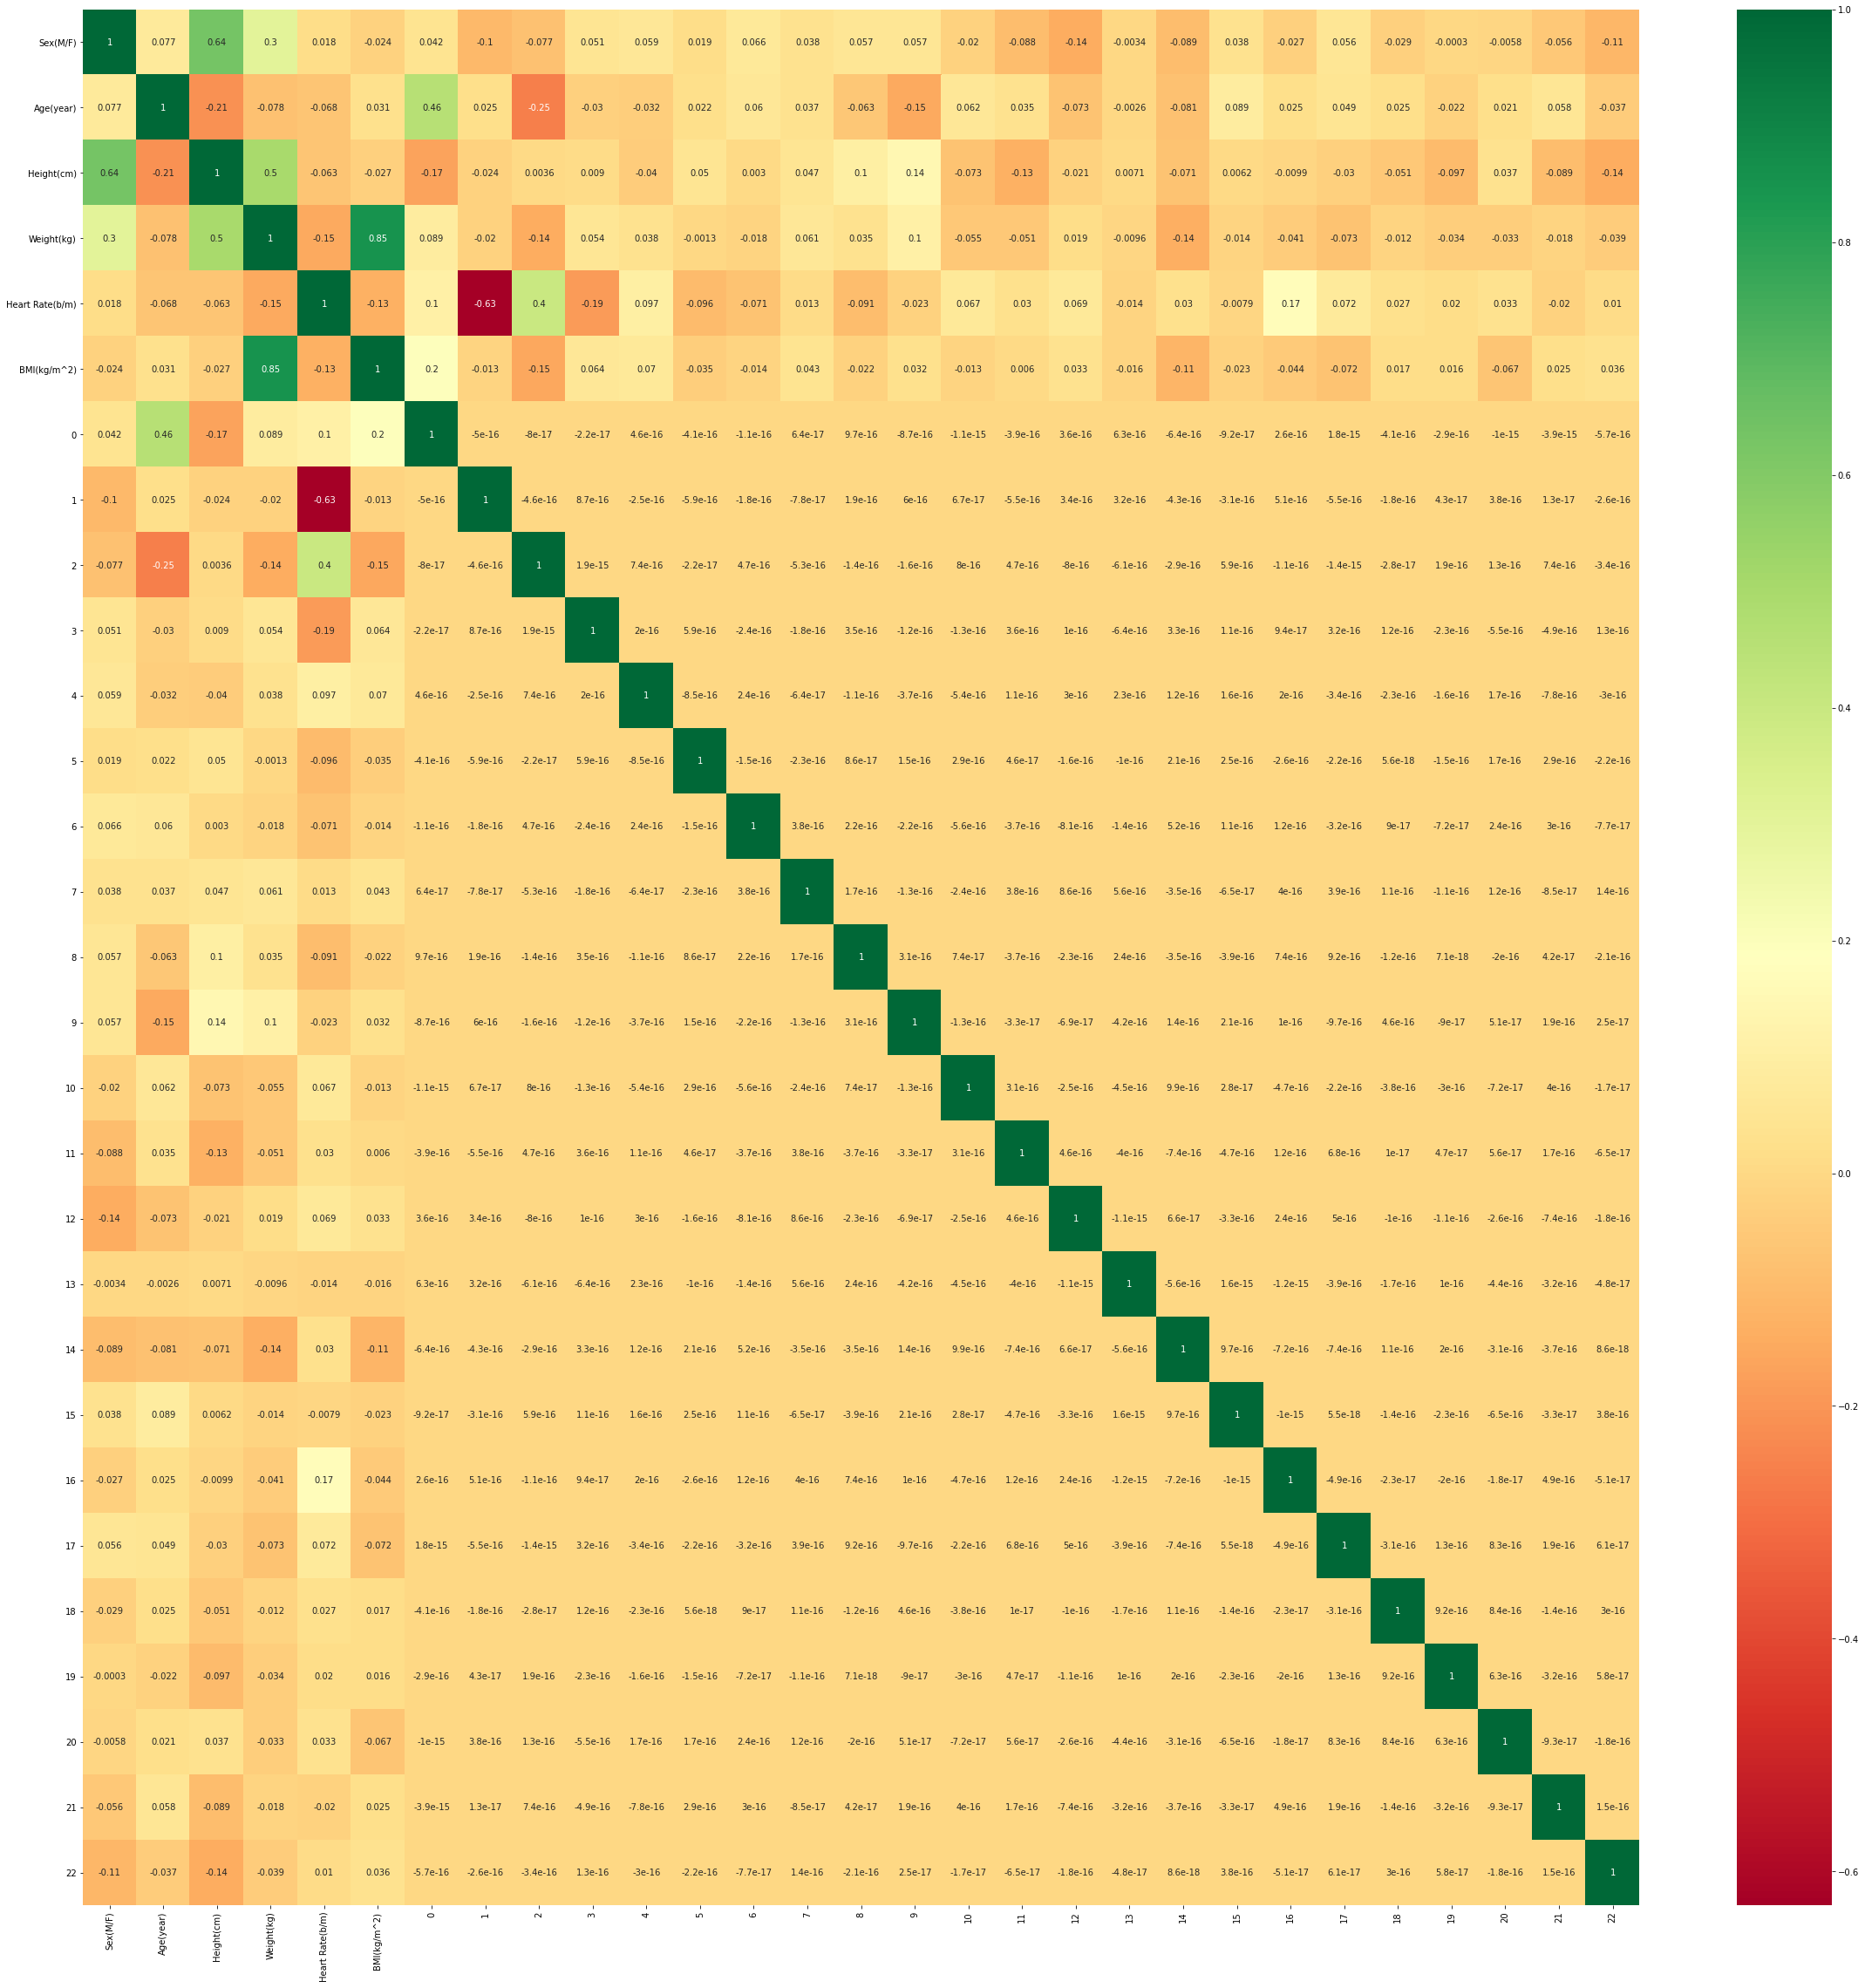

In [112]:
plt.figure(figsize=(40,40))
sns.heatmap(ppg_final_features.corr(),annot=True,cmap='RdYlGn')#Corelation matrix

In [113]:
#Splitting the data into train and test sets
from sklearn.model_selection import train_test_split
X=ppg_final_features.drop(target_labels,axis=1)
y=ppg_final_features['Hypertension']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,random_state=21)

In [114]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a RandomForest Classifier
clf=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [115]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.7698412698412699
[[35  6  1  1]
 [11 40  0  1]
 [ 2  3 11  0]
 [ 0  3  1 11]]
0.7698412698412699
                      precision    recall  f1-score   support

              Normal       0.73      0.81      0.77        43
     Prehypertension       0.77      0.77      0.77        52
Stage 1 hypertension       0.85      0.69      0.76        16
Stage 2 hypertension       0.85      0.73      0.79        15

            accuracy                           0.77       126
           macro avg       0.80      0.75      0.77       126
        weighted avg       0.77      0.77      0.77       126



In [116]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.753968253968254
[[33  7  2  1]
 [11 38  3  0]
 [ 1  1 13  1]
 [ 0  3  1 11]]
0.753968253968254
                      precision    recall  f1-score   support

              Normal       0.73      0.77      0.75        43
     Prehypertension       0.78      0.73      0.75        52
Stage 1 hypertension       0.68      0.81      0.74        16
Stage 2 hypertension       0.85      0.73      0.79        15

            accuracy                           0.75       126
           macro avg       0.76      0.76      0.76       126
        weighted avg       0.76      0.75      0.75       126



In [117]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_hastie_10_2

In [118]:
clf = GradientBoostingClassifier()
clf.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [119]:
y_pred=clf.predict(X_test)

In [120]:

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.753968253968254
[[32  8  2  1]
 [12 38  2  0]
 [ 1  1 13  1]
 [ 1  2  0 12]]
0.753968253968254
                      precision    recall  f1-score   support

              Normal       0.70      0.74      0.72        43
     Prehypertension       0.78      0.73      0.75        52
Stage 1 hypertension       0.76      0.81      0.79        16
Stage 2 hypertension       0.86      0.80      0.83        15

            accuracy                           0.75       126
           macro avg       0.77      0.77      0.77       126
        weighted avg       0.76      0.75      0.75       126



In [121]:
ppg_final_features.to_csv('PPG_Finalised.csv',index=False)